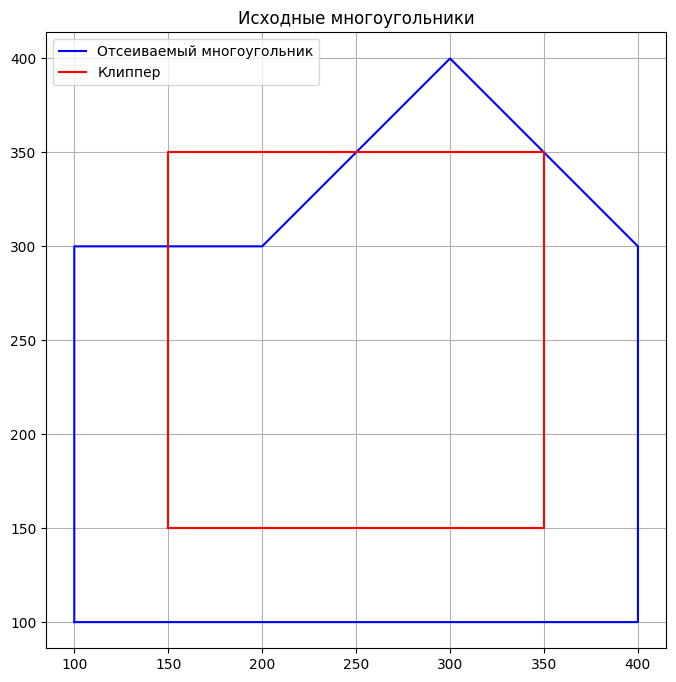

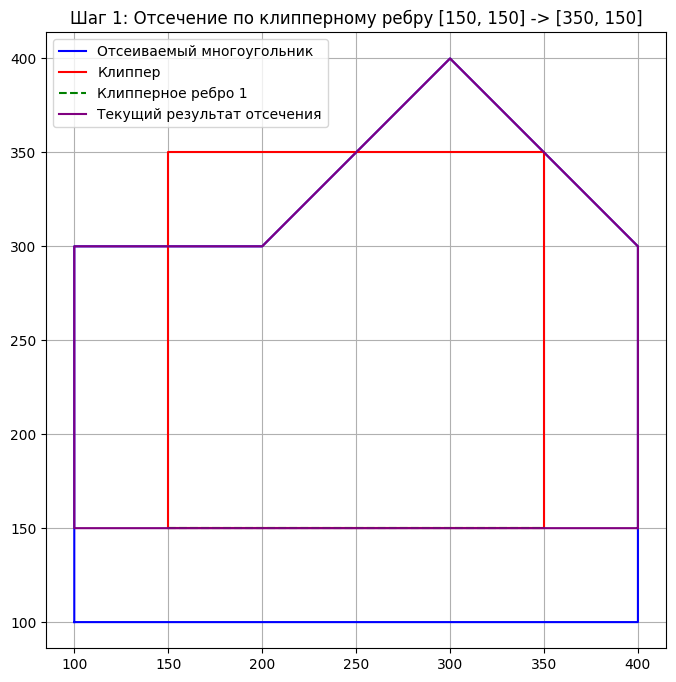

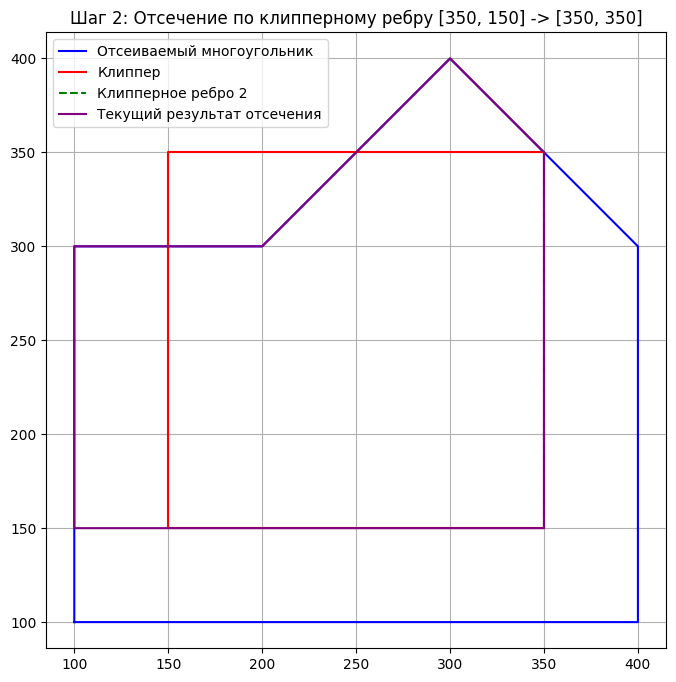

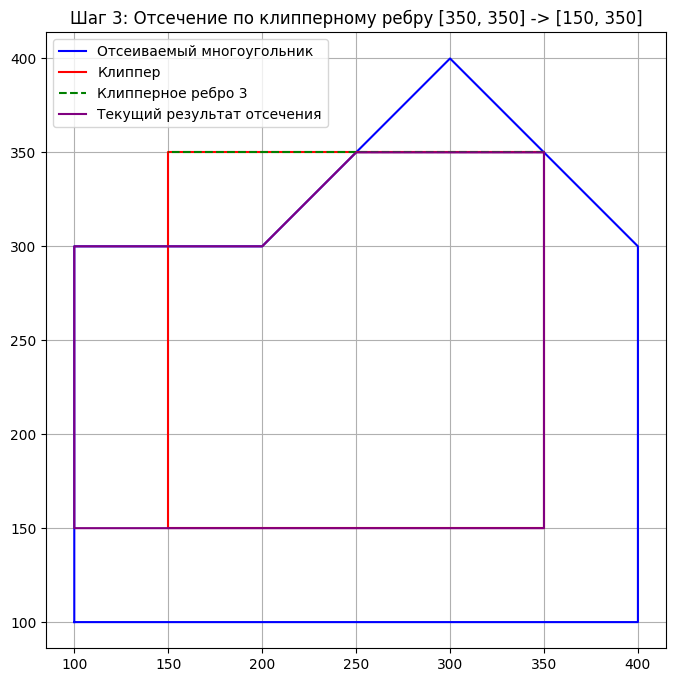

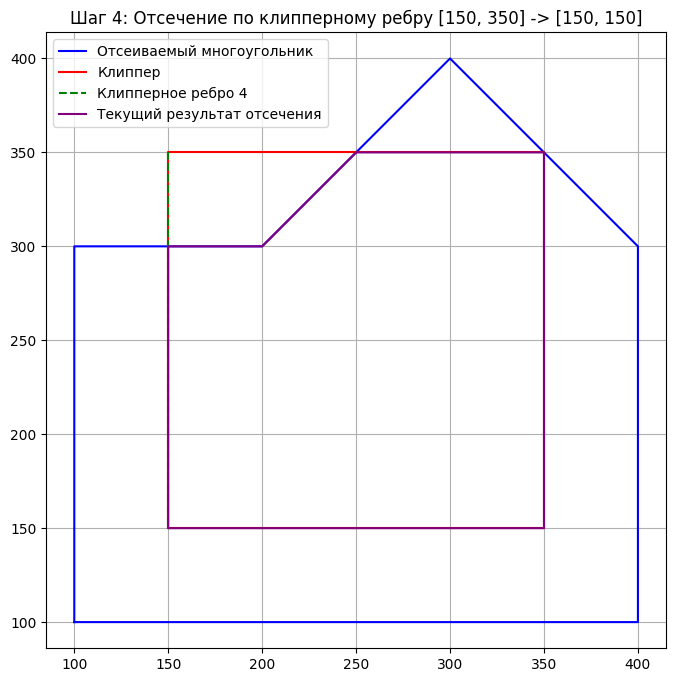

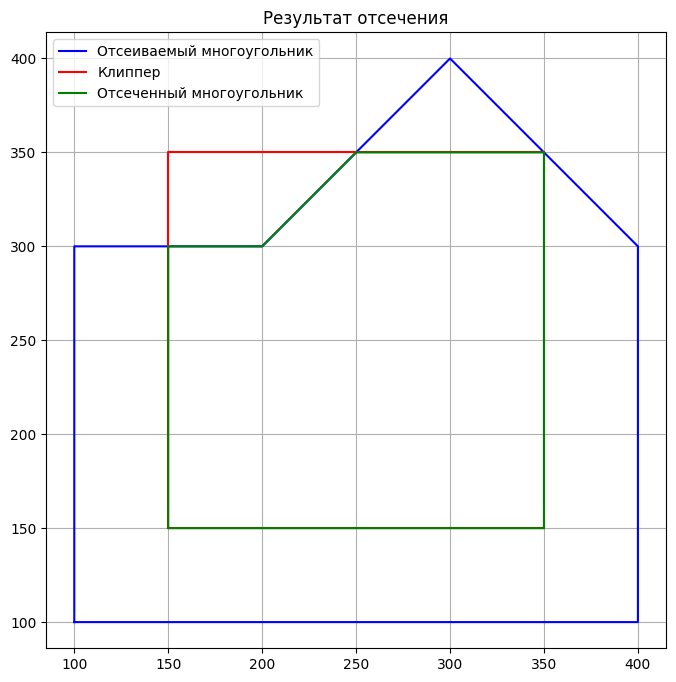

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sutherland_hodgman_clip(subject_polygon, clip_polygon):
    """
    Реализация алгоритма Сазерленда-Ходгмана для отсечения многоугольника.
    
    :param subject_polygon: Список вершин отсеиваемого многоугольника.
    :param clip_polygon: Список вершин клиппера.
    :return: Отсеченный многоугольник.
    """
    def inside(p, edge_start, edge_end):
        return (edge_end[0] - edge_start[0]) * (p[1] - edge_start[1]) - (edge_end[1] - edge_start[1]) * (p[0] - edge_start[0]) >= 0

    def compute_intersection(p1, p2, edge_start, edge_end):
        """
        Вычисляет точку пересечения двух отрезков: p1->p2 и edge_start->edge_end.
        """
        x1, y1 = p1
        x2, y2 = p2
        x3, y3 = edge_start
        x4, y4 = edge_end

        denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
        if denom == 0:
            return None  # Отрезки параллельны

        Px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4)) / denom
        Py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4)) / denom
        return [Px, Py]

    output_list = subject_polygon
    for i in range(len(clip_polygon)):
        input_list = output_list
        output_list = []
        if not input_list:
            break
        # Определение текущего клипперного ребра
        A = clip_polygon[i]
        B = clip_polygon[(i + 1) % len(clip_polygon)]
        for j in range(len(input_list)):
            P = input_list[j]
            Q = input_list[(j + 1) % len(input_list)]
            if inside(Q, A, B):
                if not inside(P, A, B):
                    intersection = compute_intersection(P, Q, A, B)
                    if intersection:
                        output_list.append(intersection)
                output_list.append(Q)
            elif inside(P, A, B):
                intersection = compute_intersection(P, Q, A, B)
                if intersection:
                    output_list.append(intersection)
        # Визуализация текущего шага
        plot_clipping_step(subject_polygon, clip_polygon, output_list, A, B, i+1)
    return output_list

def plot_clipping_step(subject, clip, output, A, B, step):
    """
    Визуализирует текущий шаг алгоритма отсечения.
    
    :param subject: Исходный многоугольник.
    :param clip: Клиппер.
    :param output: Текущий результат отсечения.
    :param A: Начало клипперного ребра.
    :param B: Конец клипперного ребра.
    :param step: Номер шага.
    """
    plt.figure(figsize=(8, 8))
    # Рисуем исходный многоугольник
    subject_np = np.array(subject, np.int32)
    plt.plot(*zip(*subject_np, subject_np[0]), label='Отсеиваемый многоугольник', color='blue')
    
    # Рисуем клиппер
    clip_np = np.array(clip, np.int32)
    plt.plot(*zip(*clip_np, clip_np[0]), label='Клиппер', color='red')
    
    # Рисуем текущее клипперное ребро
    plt.plot([A[0], B[0]], [A[1], B[1]], label=f'Клипперное ребро {step}', color='green', linestyle='--')
    
    # Рисуем текущий результат
    if output:
        output_np = np.array(output, np.int32)
        plt.plot(*zip(*output_np, output_np[0]), label='Текущий результат отсечения', color='purple')
    
    plt.title(f'Шаг {step}: Отсечение по клипперному ребру {A} -> {B}')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Определение отсеиваемого многоугольника (предметного)
subject_polygon = [
    [100, 100],
    [400, 100],
    [400, 300],
    [300, 400],
    [200, 300],
    [100, 300]
]

# Определение клиппера (окно отсечения)
clip_polygon = [
    [150, 150],
    [350, 150],
    [350, 350],
    [150, 350]
]

# Визуализация исходных многоугольников
plt.figure(figsize=(8, 8))
plt.plot(*zip(*subject_polygon, subject_polygon[0]), label='Отсеиваемый многоугольник', color='blue')
plt.plot(*zip(*clip_polygon, clip_polygon[0]), label='Клиппер', color='red')
plt.title('Исходные многоугольники')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# Применение алгоритма Сазерленда-Ходгмана
clipped_polygon = sutherland_hodgman_clip(subject_polygon, clip_polygon)

# Визуализация конечного результата
plt.figure(figsize=(8, 8))
plt.plot(*zip(*subject_polygon, subject_polygon[0]), label='Отсеиваемый многоугольник', color='blue')
plt.plot(*zip(*clip_polygon, clip_polygon[0]), label='Клиппер', color='red')
if clipped_polygon:
    clipped_np = np.array(clipped_polygon, np.int32)
    plt.plot(*zip(*clipped_np, clipped_np[0]), label='Отсеченный многоугольник', color='green')
plt.title('Результат отсечения')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()